In [121]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [122]:
csvFiles = glob('*.csv')

In [123]:
dataframes = []
for file in csvFiles:
    df = pd.read_csv(file)
    dataframes.append(df)

In [124]:
report = pd.concat(dataframes,ignore_index=True)
report.head()
# This table is to report overall distribution of data

Canopy  PlotNumber    DGCI  pixel_DGCI Location   date    alt
0  3153.60         101  0.0129       40.68   Amenia  06-23  100Ft
1  2501.28         102  0.0133       33.27   Amenia  06-23  100Ft
2  2300.94         103  0.0083       19.10   Amenia  06-23  100Ft
3  1618.38         104  0.0059        9.55   Amenia  06-23  100Ft
4  1740.96         105  0.0072       12.53   Amenia  06-23  100Ft

In [125]:
# df.isnull().sum()

In [126]:
Jun23.tail()

Canopy  PlotNumber    DGCI  pixel_DGCI Location   date    alt  \
475    6562         436  0.1508      989.55  Leonard  07-01  100Ft   
476    6211         437  0.1584      983.82  Leonard  07-01  100Ft   
477    7605         438  0.1755     1334.68  Leonard  07-01  100Ft   
478    7292         439  0.1941     1415.38  Leonard  07-01  100Ft   
479    7141         440  0.1738     1241.11  Leonard  07-01  100Ft   

         Plot_Loc       YLD3  IDC1        Cultivar  
475  Leonard, 436  64.910547   1.5       REA R0815  
476  Leonard, 437  63.056558   1.5  Channel 0807R2  
477  Leonard, 438  52.313872   1.0   Legend 03R650  
478  Leonard, 439  54.604440   1.0        NKS12-R3  
479  Leonard, 440  52.105595   1.5       REA R0216

In [127]:
# find out what date you want to use to report for each location. How you want to summarize the data for each location.

In [128]:
df = pd.read_excel('AUC_2016.xlsx', sheet_name='AUC')

In [129]:
df.head()

Canopy  PlotNumber    DGCI Location       date   alt     Plot_Loc  \
0  3153.60         101  0.2009   Amenia 2019-06-23  66Ft  Amenia, 101   
1  2501.28         102  0.2110   Amenia 2019-06-23  66Ft  Amenia, 102   
2  2300.94         103  0.2065   Amenia 2019-06-23  66Ft  Amenia, 103   
3  1618.38         104  0.1926   Amenia 2019-06-23  66Ft  Amenia, 104   
4  1740.96         105  0.2066   Amenia 2019-06-23  66Ft  Amenia, 105   

        YLD3  IDC1          Cultivar  tbl_0701.Canopy  tbl_0701.DGCI  \
0  38.955969   1.0   Thunder 3601R2Y             4403         0.2687   
1  55.821002   1.0          NKS08-M2             3293         0.2617   
2  40.826570   1.0         REA 64G94             4242         0.2697   
3  42.933747   1.0        PFS 15R07N             3401         0.2573   
4  38.205736   1.0  Thunder 3606R2Yn             2586         0.2643   

  tbl_0701.Plot_Loc  tbl_0722.Canopy  tbl_0722.DGCI tbl_0722.Plot_Loc  \
0       Amenia, 101           3687.0         0.4395       Amenia, 101   
1       Amenia, 102           4642.0         0.4577       Amenia, 102   
2       Amenia, 103           4642.0         0.4555       Amenia, 103   
3       Amenia, 104           3247.0         0.4392       Amenia, 104   
4       Amenia, 105           1913.0         0.4532       Amenia, 105   

   tbl_0729.Canopy  tbl_0729.DGCI tbl_0729.Plot_Loc       AUC  
0           7790.0         0.3555       Amenia, 101  12.80520  
1           7069.0         0.3540       Amenia, 102  13.00485  
2           7425.0         0.3823       Amenia, 103  13.17690  
3           8249.0         0.3344       Amenia, 104  12.51695  
4           4485.0         0.3353       Amenia, 105  12.89460

In [130]:
df.dropna(how='any', inplace=True)
df.shape

(433, 20)

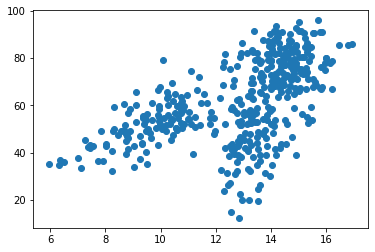

In [131]:
plt.scatter(df.AUC, df.YLD3)

In [30]:
np.corrcoef(df.AUC, df.YLD3)

array([[1.        , 0.53884147],
       [0.53884147, 1.        ]])

In [35]:
ml = df[['DGCI','Canopy','tbl_0701.DGCI','tbl_0701.Canopy','tbl_0722.DGCI','tbl_0722.Canopy','tbl_0729.DGCI','tbl_0729.Canopy','YLD3']]
ml.head()

DGCI   Canopy  tbl_0701.DGCI  tbl_0701.Canopy  tbl_0722.DGCI  \
0  0.2009  3153.60         0.2687             4403         0.4395   
1  0.2110  2501.28         0.2617             3293         0.4577   
2  0.2065  2300.94         0.2697             4242         0.4555   
3  0.1926  1618.38         0.2573             3401         0.4392   
4  0.2066  1740.96         0.2643             2586         0.4532   

   tbl_0722.Canopy  tbl_0729.DGCI  tbl_0729.Canopy       YLD3  
0           3687.0         0.3555           7790.0  38.955969  
1           4642.0         0.3540           7069.0  55.821002  
2           4642.0         0.3823           7425.0  40.826570  
3           3247.0         0.3344           8249.0  42.933747  
4           1913.0         0.3353           4485.0  38.205736

In [102]:
X = ml.iloc[:,:-1]
y = ml.iloc[:,-1]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=13)

In [120]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=20, random_state=13,bootstrap=True)
# rf=AdaBoostRegressor(n_estimators=10,random_state=13,learning_rate=0.91)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE=',round(rmse,2),'\nRsquare=', round(rf.score(X_test, y_test),2))

RMSE= 8.49 
Rsquare= 0.77


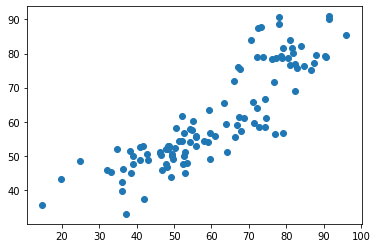

In [85]:
plt.scatter(y_test, y_pred)

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE=',round(rmse,2),'\nRsquare=', round(lr.score(X_test, y_test),2))

RMSE= 8.89 
Rsquare= 0.75


RMSE= 10.48 
Rsquare= 0.65
